In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import statsmodels.stats as stm
import random
import os
%matplotlib inline
from statsmodels.stats import descriptivestats
import plotly.express as px
import warnings
warnings.filterwarnings(action='ignore')
from sklearn.preprocessing import MinMaxScaler,RobustScaler,StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,mean_absolute_percentage_error

In [2]:
df = pd.read_csv(r'D:\Internship from Evos\Used_car_data.csv', encoding= 'latin1')
df.head()

Name  \
0           Hyundai Creta SX PLUS AT 1.6 PETROL   
1  Renault Kwid 1.0 MARVEL IRON MAN EDITION AMT   
2                      Hyundai Eon ERA PLUS (O)   
3                              Maruti Swift VXI   
4                   Hyundai Creta SX 1.6 DIESEL   

                                  Model  Company  Year Fuel Type  KM Driven  \
0           Creta SX PLUS AT 1.6 PETROL  Hyundai  2017    PETROL      98493   
1  Kwid 1.0 MARVEL IRON MAN EDITION AMT  Renault  2018    PETROL      19178   
2                      Eon ERA PLUS (O)  Hyundai  2017    PETROL      33963   
3                             Swift VXI   Maruti  2012    PETROL      64557   
4                   Creta SX 1.6 DIESEL  Hyundai  2019    DIESEL      43987   

  Transmission Type  Price(in Lakh)   Location  
0         Automatic          973000  Bangalore  
1         Automatic          407000  Bangalore  
2            Manual          381000  Bangalore  
3            Manual          463000  Bangalore  
4            Manual         1150000  Bangalore

In [3]:
df.shape

(2020, 9)

#### Need to do sanity check of the given data "Used cars"

In [4]:
df.isnull().sum() 

Name                 0
Model                0
Company              0
Year                 0
Fuel Type            0
KM Driven            0
Transmission Type    0
Price(in Lakh)       0
Location             0
dtype: int64

By this we can also find out the column name of the given data set

In [5]:
df.drop(columns=['Name'],inplace=True) 

It has been used to drop down the columns which is not necessary for the time being

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2020 entries, 0 to 2019
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Model              2020 non-null   object
 1   Company            2020 non-null   object
 2   Year               2020 non-null   int64 
 3   Fuel Type          2020 non-null   object
 4   KM Driven          2020 non-null   int64 
 5   Transmission Type  2020 non-null   object
 6   Price(in Lakh)     2020 non-null   int64 
 7   Location           2020 non-null   object
dtypes: int64(3), object(5)
memory usage: 126.4+ KB


In [7]:
df.duplicated().sum() 

0

So now we can see there was no duplicate data in the given data set i.e"Used Car"

In [8]:
df['Company'].value_counts()

Company
Maruti      713
Hyundai     582
Honda       231
Tata        173
Renault     160
Mahindra     87
KIA          74
Name: count, dtype: int64

In [9]:
len(df['Company'].value_counts())

7

In [10]:
df['Company'].unique()

array(['Hyundai', 'Renault', 'Maruti', 'Tata', 'Mahindra', 'KIA', 'Honda'],
      dtype=object)

There are total 7 unique car companies which will not effect the car price, rather the price will be depend on how many years it has been used , Km driven etc.

In [11]:
cp=round(df.Company.value_counts(normalize=True)*100,2)
cp

Company
Maruti      35.30
Hyundai     28.81
Honda       11.44
Tata         8.56
Renault      7.92
Mahindra     4.31
KIA          3.66
Name: proportion, dtype: float64

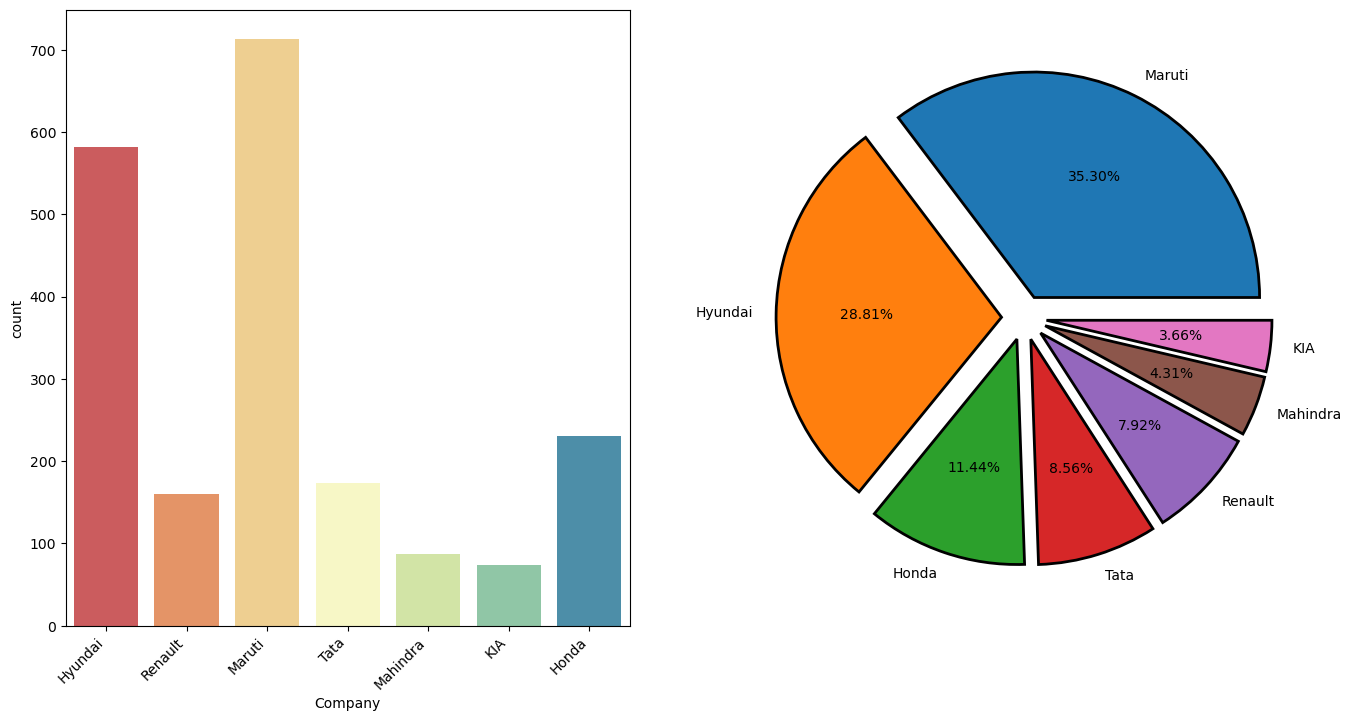

In [12]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.countplot(x='Company',data=df,palette='Spectral' )
plt.xticks(rotation=45, ha='right')


plt.subplot(1,2,2)
wp = {"linewidth":2,"edgecolor":'black'}
plt.pie(df['Company'].value_counts(),labels = cp.index,autopct='%.2f%%',explode = [0.1,0.1,0.1,0.1,0.1,0.1,0.1],wedgeprops= wp)
plt.show()


In [13]:
md=df['Model'].value_counts()
md.head(20)

Model
Swift VXI                          43
Wagon R 1.0 VXI                    40
Baleno ZETA PETROL 1.2             30
Grand i10 SPORTZ 1.2 KAPPA VTVT    27
City 1.5L I-VTEC V MT              26
Baleno DELTA PETROL 1.2            24
Creta SX PLUS AT 1.6 PETROL        20
Elite i20 SPORTZ 1.2               20
Swift Dzire VXI                    18
Xcent S 1.2                        18
Grand i10 ASTA 1.2 KAPPA VTVT      17
Wagon R 1.0 LXI CNG                17
City 1.5L I-VTEC VX CVT            17
i20 SPORTZ 1.2                     17
Grand i10 MAGNA 1.2 KAPPA VTVT     16
S PRESSO VXI+                      16
Wagon R 1.0 VXI AMT                16
Creta E PLUS 1.6 PETROL            16
Celerio VXI AMT                    15
WR-V 1.2L I-VTEC VX MT             15
Name: count, dtype: int64

### The Organisation want to understand the factore that affecting the Pricing of the Used car in the market.

Year represent the year in which car have been purchased.
so we can estimate the number of year that car has been used.

In [14]:
df['current_year']=2024 # current year column has been added

In [15]:
df['No_of_years'] = df['current_year']-df['Year']
df = df.drop(['current_year'],axis=1)
df.head()

Model  Company  Year Fuel Type  KM Driven  \
0           Creta SX PLUS AT 1.6 PETROL  Hyundai  2017    PETROL      98493   
1  Kwid 1.0 MARVEL IRON MAN EDITION AMT  Renault  2018    PETROL      19178   
2                      Eon ERA PLUS (O)  Hyundai  2017    PETROL      33963   
3                             Swift VXI   Maruti  2012    PETROL      64557   
4                   Creta SX 1.6 DIESEL  Hyundai  2019    DIESEL      43987   

  Transmission Type  Price(in Lakh)   Location  No_of_years  
0         Automatic          973000  Bangalore            7  
1         Automatic          407000  Bangalore            6  
2            Manual          381000  Bangalore            7  
3            Manual          463000  Bangalore           12  
4            Manual         1150000  Bangalore            5

In [16]:
df.Location.value_counts()

Location
Bangalore    1107
Mumbai        530
New Delhi     279
Kolkata       104
Name: count, dtype: int64

In [17]:
rp=round(df.Location.value_counts(normalize=True)*100,2)
rp

Location
Bangalore    54.80
Mumbai       26.24
New Delhi    13.81
Kolkata       5.15
Name: proportion, dtype: float64

So these are the 4 Location where the Used Care sales has been done 

Let's Check out the Vizulitation of the Location

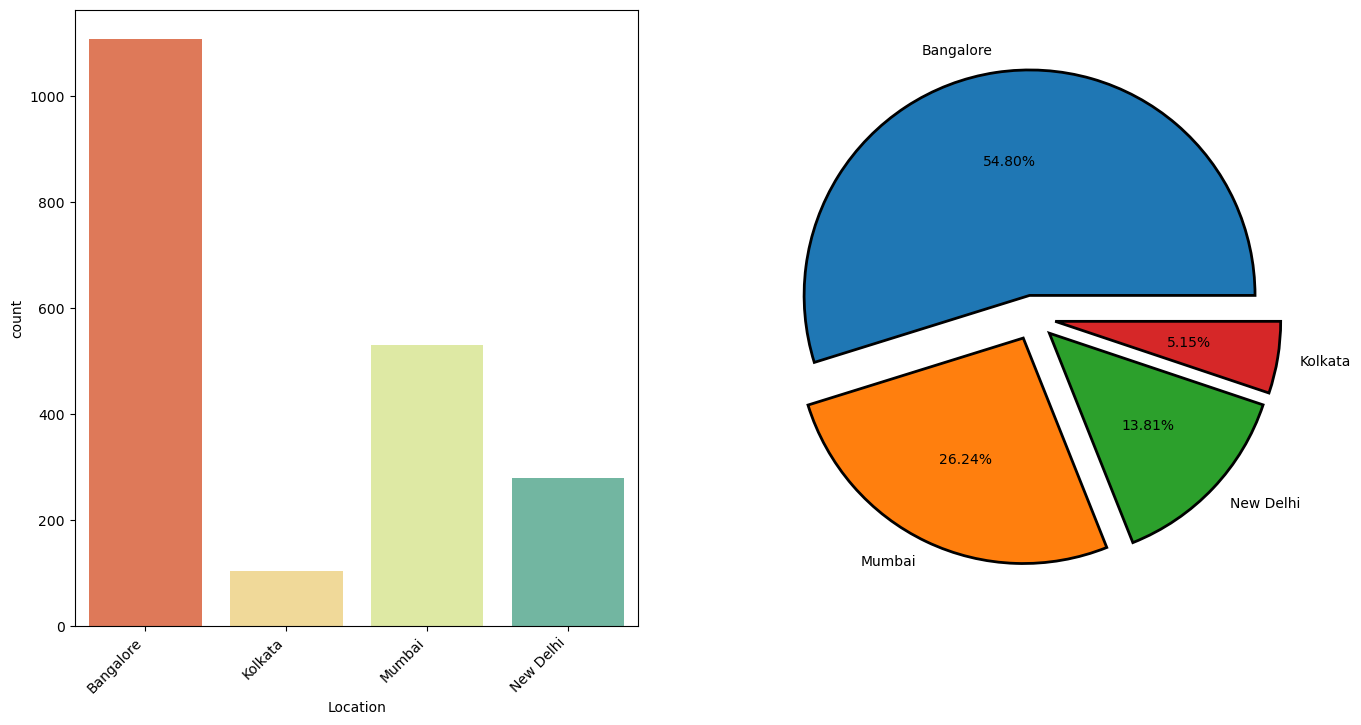

In [18]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.countplot(x='Location',data=df,palette='Spectral' )
plt.xticks(rotation=45, ha='right')


plt.subplot(1,2,2)
wp = {"linewidth":2,"edgecolor":'black'}
plt.pie(df['Location'].value_counts(),labels = rp.index,autopct='%.2f%%',explode = [0.1,0.1,0.1,0.1],wedgeprops= wp)
plt.show()


From the above picture we can determine that Used care sales are much Higher in "Bangalore Location" than the Other 3 Locations

In [19]:
df.groupby('Location',as_index=False)['Price(in Lakh)'].sum().sort_values('Price(in Lakh)',ascending =False)

Location  Price(in Lakh)
0  Bangalore       764292000
2     Mumbai       313876000
3  New Delhi       164811000
1    Kolkata        55362000

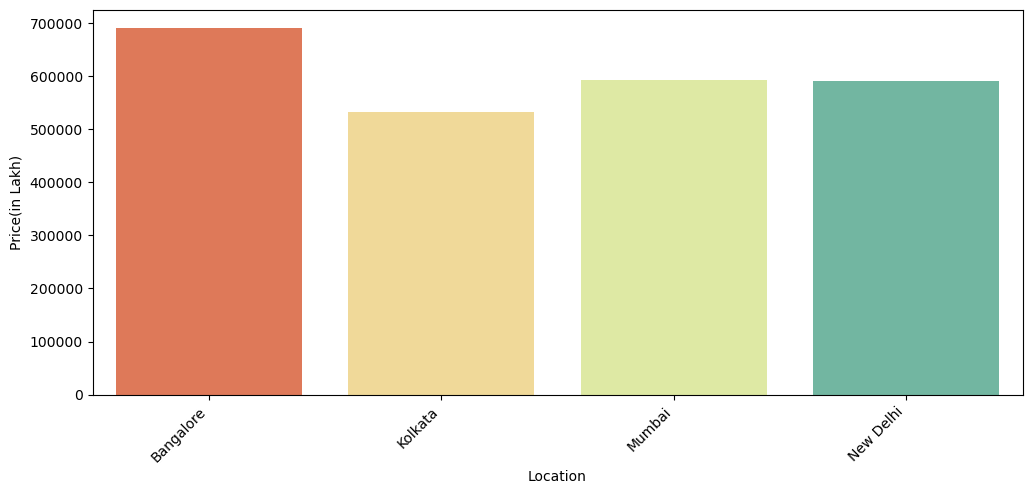

In [20]:
plt.figure(figsize=(12,5))
sns.barplot(df,x='Location',y ='Price(in Lakh)',palette='Spectral',errorbar=None)
plt.xticks(rotation=45, ha='right')
plt.show()

In [21]:
df.groupby('Model',as_index=False)['Location'].value_counts().sort_values('Model',ascending =True)

Model   Location  count
0                           A Star LXI  Bangalore      1
1                           A Star VXI  Bangalore      1
2    ALCAZAR 1.5 SIGNATURE (O) AT 6STR  Bangalore      1
3    ALCAZAR 2.0 SIGNATURE (O) AT 7STR  Bangalore      1
4     ALCAZAR PRESTIGE (O) 6STR 2.0 AT  Bangalore      1
..                                 ...        ...    ...
929                 i20 SPORTZ (O) 1.2  Bangalore      2
932                     i20 SPORTZ 1.2  New Delhi      5
933                     i20 SPORTZ 1.2     Mumbai      4
931                     i20 SPORTZ 1.2  Bangalore      8
934                i20 SPORTZ 1.4 CRDI  Bangalore      3

[935 rows x 3 columns]

In [22]:
tr =round(df['Transmission Type'].value_counts(normalize=True)*100,2)
tr

Transmission Type
Manual       70.79
Automatic    29.21
Name: proportion, dtype: float64

#### Buyer's Preffer more manual transmission than Automatic which is 71%

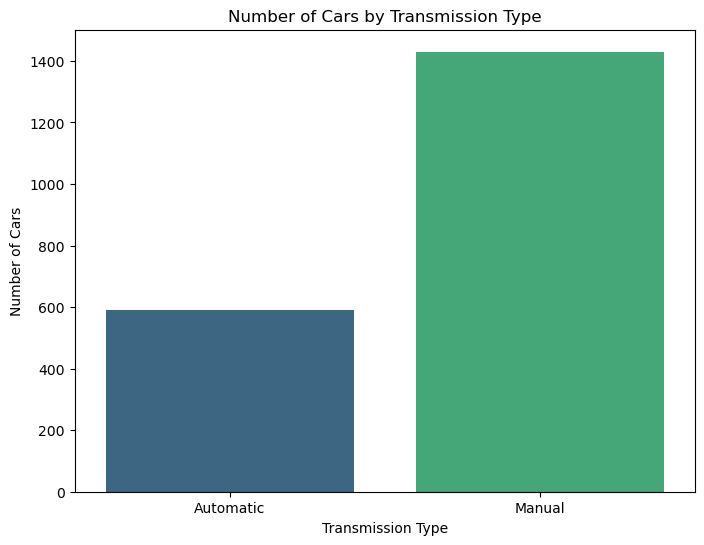

In [23]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Transmission Type', data=df,palette='viridis')
plt.title('Number of Cars by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Number of Cars')
plt.show()

<Figure size 8000x7000 with 0 Axes>

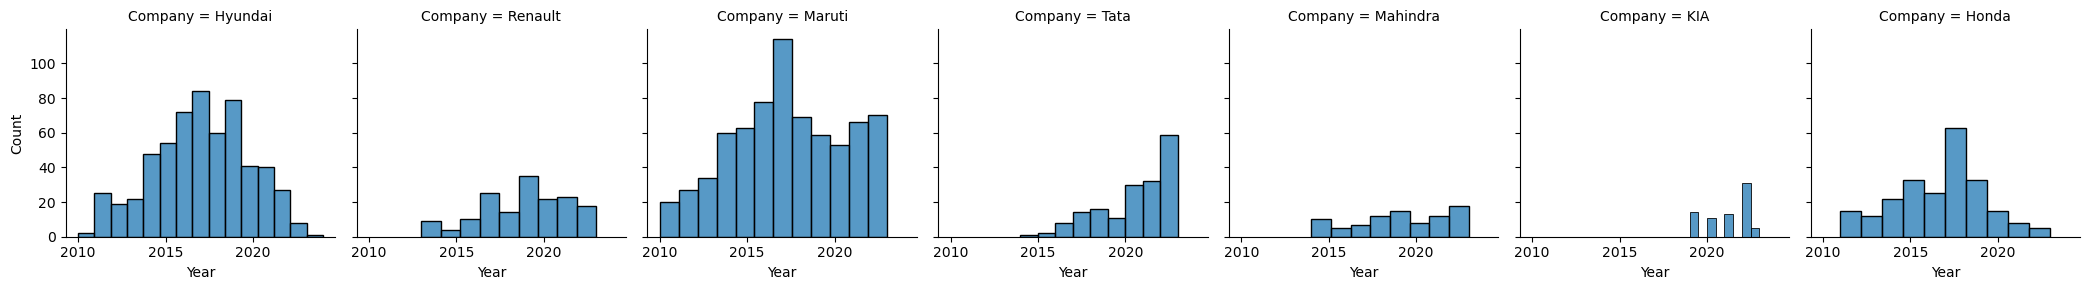

In [24]:
plt.figure(figsize=(80,70))
sns.FacetGrid(df, col="Company").map_dataframe(sns.histplot, x="Year")
plt.show()

In [25]:
df['Fuel Type'].value_counts()

Fuel Type
PETROL    1699
DIESEL     229
CNG         92
Name: count, dtype: int64

In [26]:
fl=round(df['Fuel Type'].value_counts(normalize=True)*100,2)
fl

Fuel Type
PETROL    84.11
DIESEL    11.34
CNG        4.55
Name: proportion, dtype: float64

### Most of the used car are running with Petrol which is 84.11%

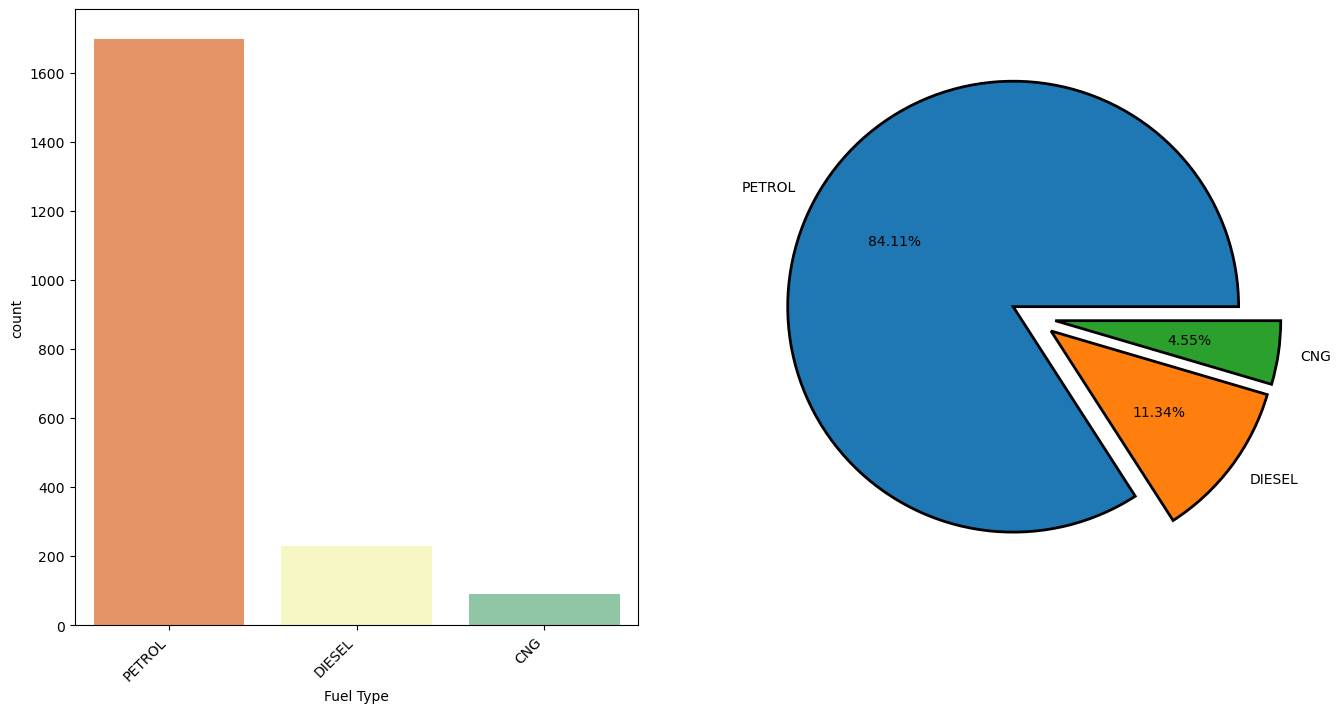

In [27]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.countplot(x='Fuel Type',data=df,palette='Spectral' )
plt.xticks(rotation=45, ha='right')


plt.subplot(1,2,2)
wp = {"linewidth":2,"edgecolor":'black'}
plt.pie(df['Fuel Type'].value_counts(),labels = fl.index,autopct='%.2f%%',explode = [0.1,0.1,0.1],wedgeprops= wp)
plt.show()


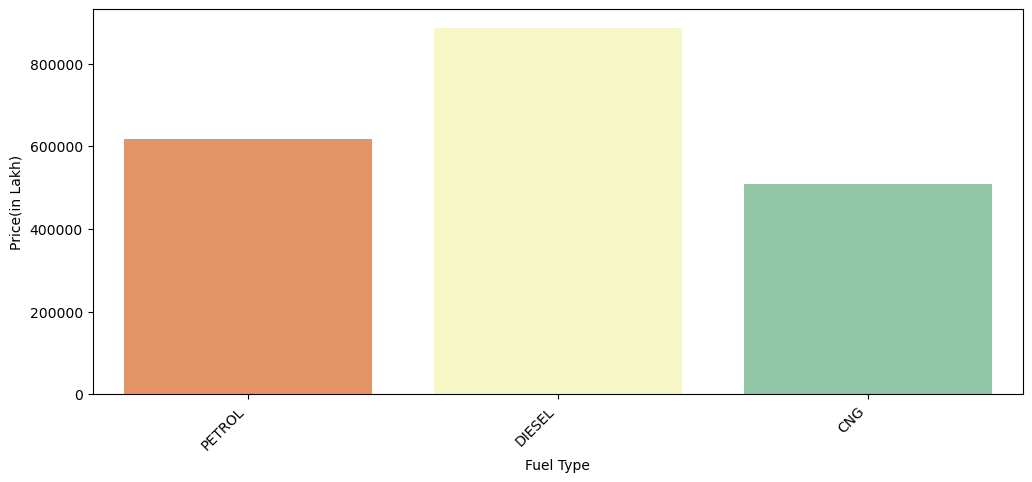

In [28]:
plt.figure(figsize=(12,5))
sns.barplot(df,x='Fuel Type',y ='Price(in Lakh)',palette='Spectral',errorbar=None)
plt.xticks(rotation=45, ha='right')
plt.show()

<Figure size 1200x1700 with 0 Axes>

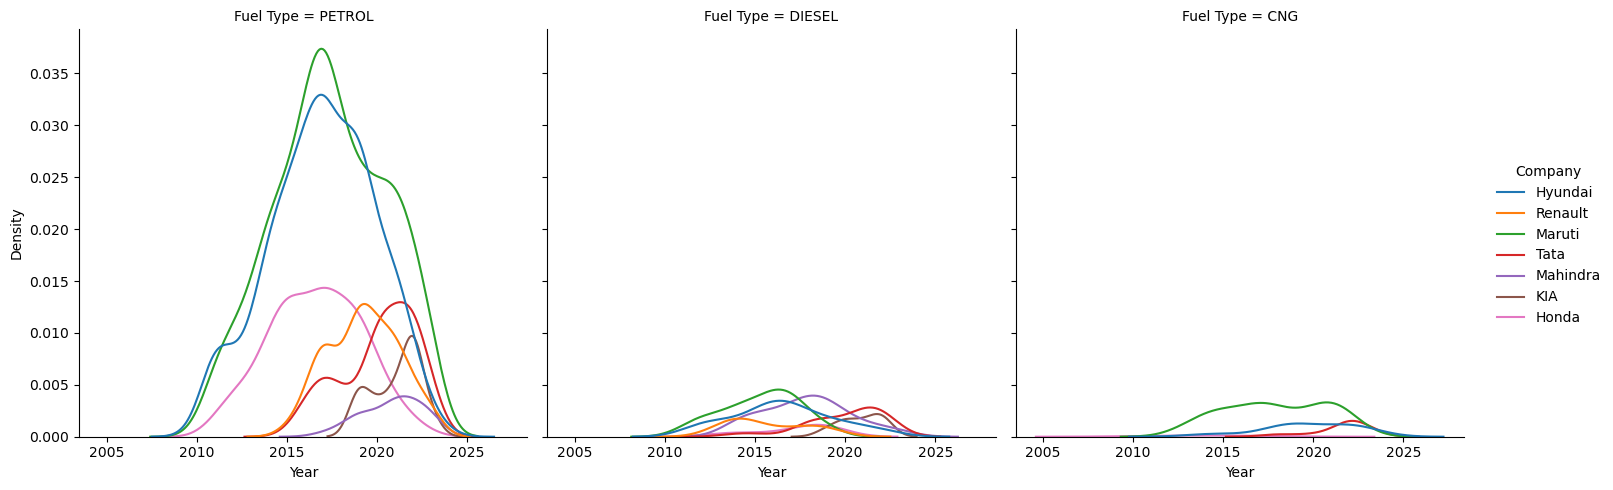

In [29]:
plt.figure(figsize=(12,17))
sns.displot(data = df, x="Year", hue="Company", col="Fuel Type", kind="kde",)
plt.show()

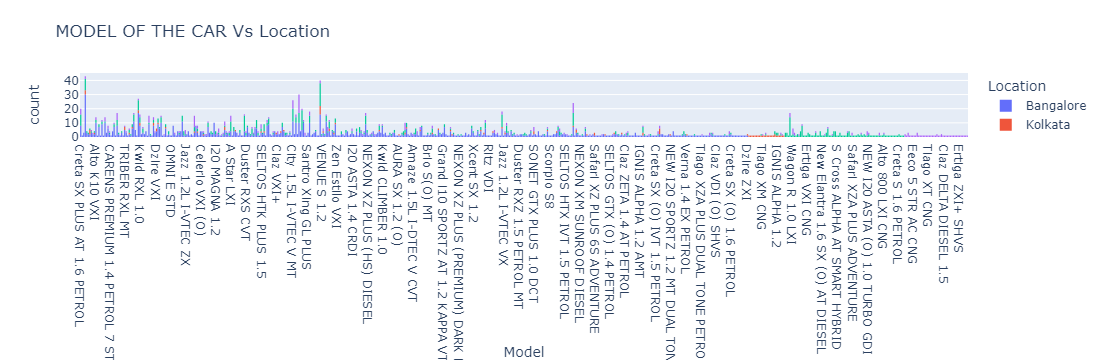

In [30]:
dia = px.histogram(df, x = "Model",
                  color = "Location",
                  labels = {"Make":"All Brands"},
                  title = "MODEL OF THE CAR Vs Location")
                  
dia.show()

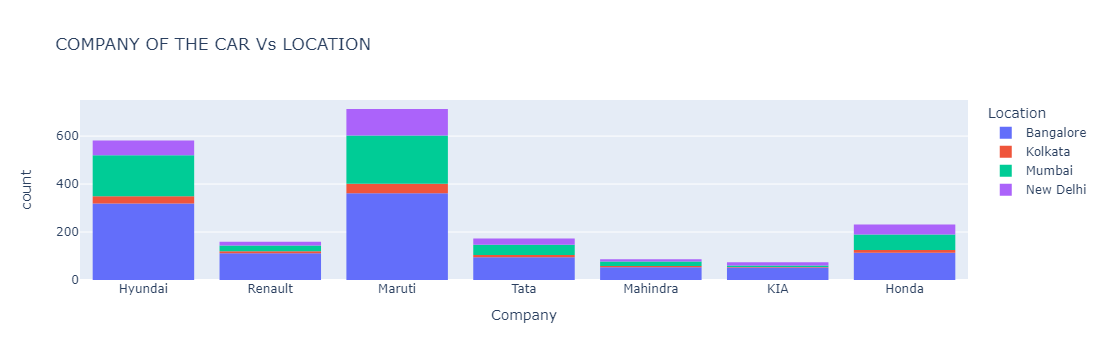

In [31]:
dia = px.histogram(df, x = "Company",
                  color = "Location",
                  labels = {"Make":"All Company"},
                  title = "COMPANY OF THE CAR Vs LOCATION")
                  
dia.show()

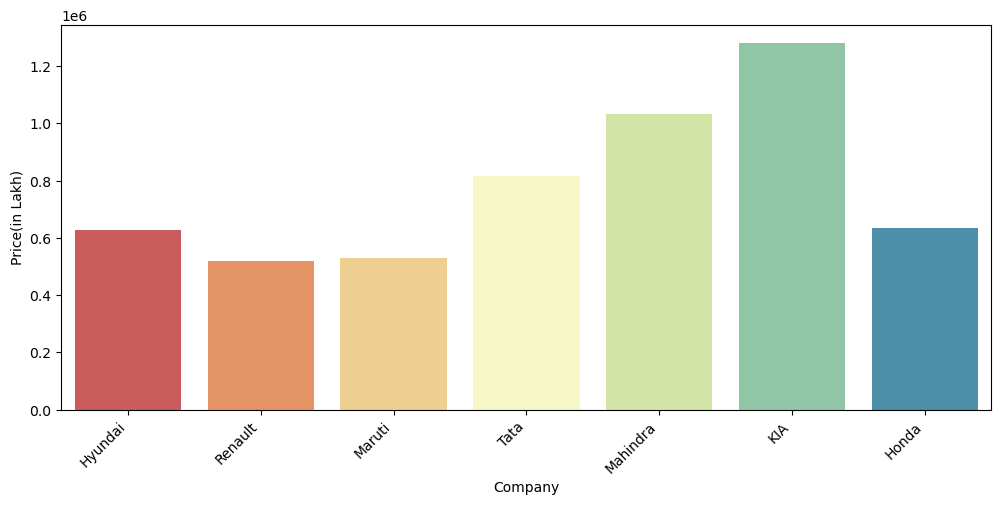

In [32]:
plt.figure(figsize=(12,5))
sns.barplot(df,x='Company',y ='Price(in Lakh)',palette='Spectral',errorbar=None)
plt.xticks(rotation=45, ha='right')
plt.show()

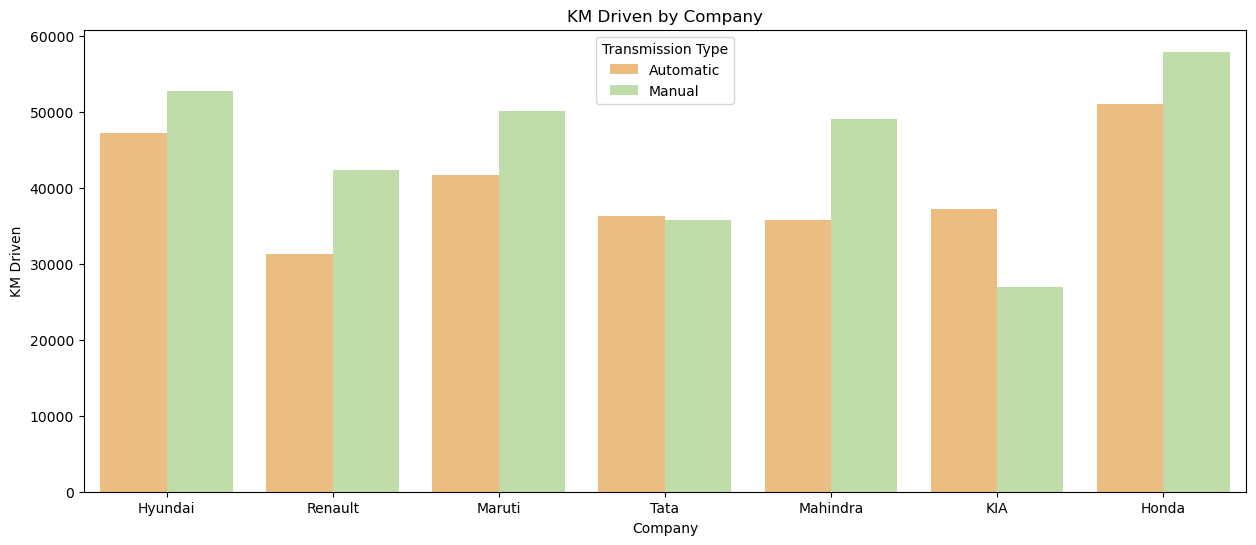

In [33]:
plt.figure(figsize=(15,6))
sns.barplot(data=df, y="KM Driven", x="Company", hue="Transmission Type",errorbar=None,palette='Spectral')
plt.title("KM Driven by Company")
plt.show()

In [34]:
a=df.groupby('KM Driven')['Price(in Lakh)'].sum()
a

KM Driven
1011      385000
1343      634000
1768      578000
1848      973000
1958      589000
           ...  
124446    790000
130578    661000
130587    218000
139583    554000
143991    285000
Name: Price(in Lakh), Length: 1997, dtype: int64

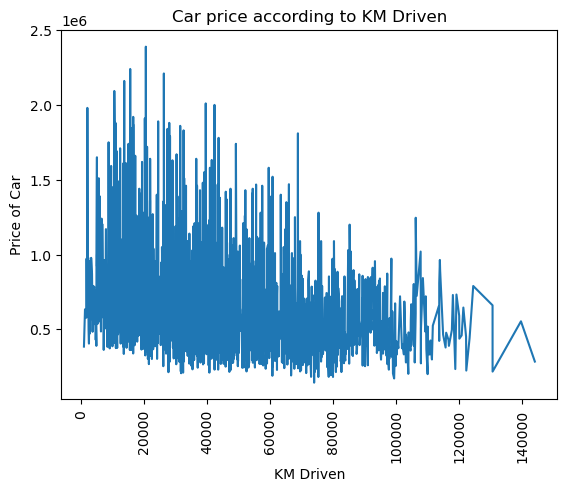

In [35]:
print(plt.plot(a))
plt.title('Car price according to KM Driven')
plt.xlabel('KM Driven')
plt.ylabel('Price of Car')
plt.xticks(rotation=90)
plt.show()

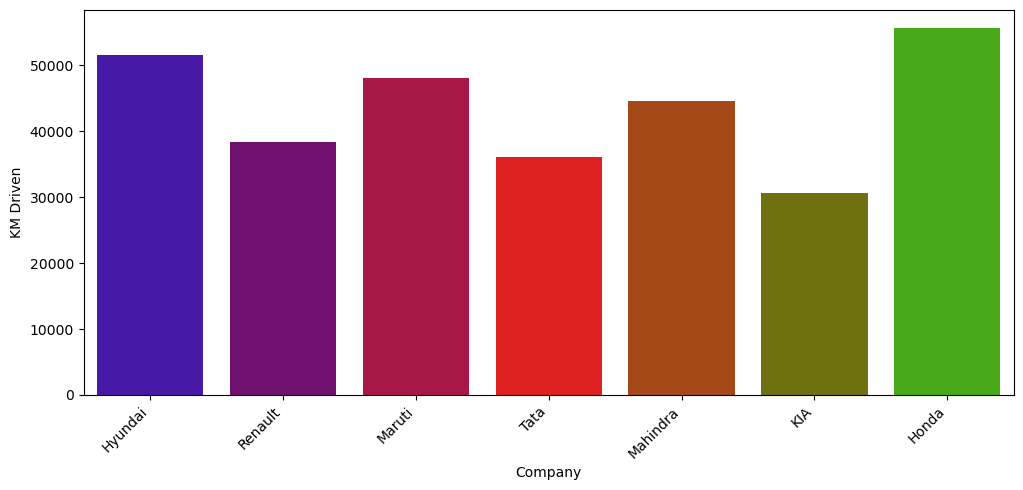

In [36]:
plt.figure(figsize=(12,5))
sns.barplot(df,x='Company',y ='KM Driven',palette='brg',errorbar=None)
plt.xticks(rotation=45, ha='right')
plt.show()

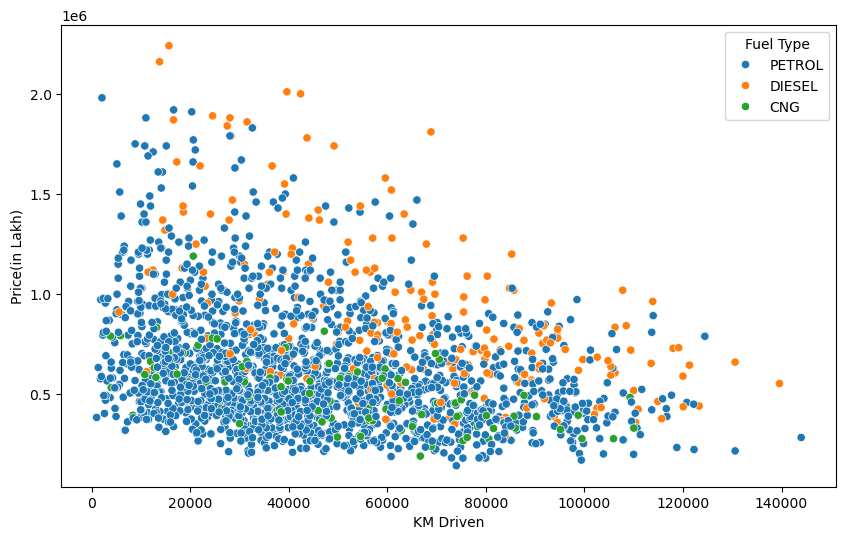

In [37]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='KM Driven', y='Price(in Lakh)', hue='Fuel Type')
plt.show()

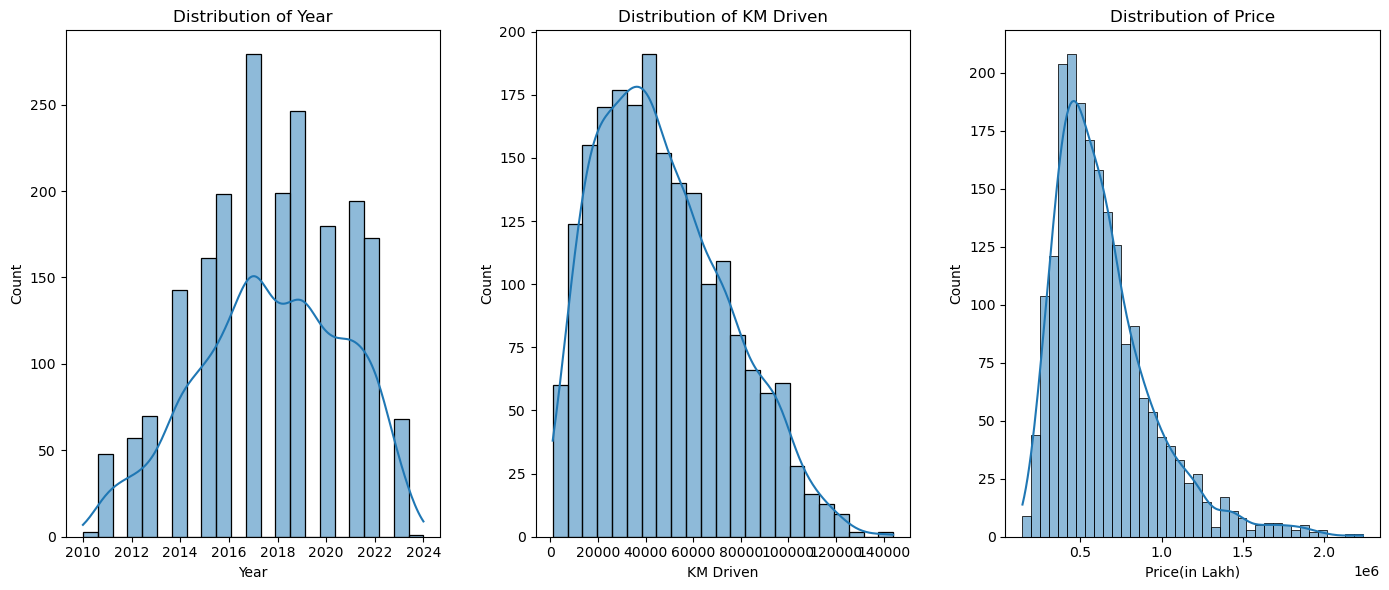

In [38]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
sns.histplot(df['Year'], kde=True)
plt.title('Distribution of Year')

plt.subplot(1, 3, 2)
sns.histplot(df['KM Driven'], kde=True)
plt.title('Distribution of KM Driven')

plt.subplot(1, 3, 3)
sns.histplot(df['Price(in Lakh)'], kde=True)
plt.title('Distribution of Price')

plt.tight_layout()
plt.show()

In [39]:
descriptivestats.describe(df)

Year     KM Driven  Price(in Lakh)   No_of_years
nobs              2.020000e+03  2.020000e+03    2.020000e+03  2.020000e+03
missing           0.000000e+00  0.000000e+00    0.000000e+00  0.000000e+00
mean              2.017725e+03  4.723642e+04    6.427431e+05  6.275248e+00
std_err           6.683349e-02  6.037497e+02    6.839244e+03  6.683349e-02
upper_ci          2.017856e+03  4.841975e+04    6.561477e+05  6.406239e+00
lower_ci          2.017594e+03  4.605309e+04    6.293384e+05  6.144256e+00
std               3.003792e+00  2.713517e+04    3.073858e+05  3.003792e+00
iqr               4.000000e+00  3.984125e+04    3.532500e+05  4.000000e+00
iqr_normal        2.965204e+00  2.953436e+04    2.618646e+05  2.965204e+00
mad               2.493107e+00  2.231824e+04    2.304912e+05  2.493107e+00
mad_normal        3.124646e+00  2.797177e+04    2.888779e+05  3.124646e+00
coef_var          1.488702e-03  5.744545e-01    4.782405e-01  4.786730e-01
range             1.400000e+01  1.429800e+05    2.096000e+06  1.400000e+01
max               2.024000e+03  1.439910e+05    2.240000e+06  1.400000e+01
min               2.010000e+03  1.011000e+03    1.440000e+05  0.000000e+00
skew             -2.308204e-01  5.438269e-01    1.463769e+00  2.308204e-01
kurtosis          2.331197e+00  2.645988e+00    5.844457e+00  2.331197e+00
jarque_bera       5.558451e+01  1.101165e+02    1.402336e+03  5.558451e+01
jarque_bera_pval  8.510923e-13  1.226030e-24   3.066899e-305  8.510923e-13
mode              2.017000e+03  6.820000e+03    1.030000e+06  7.000000e+00
mode_freq         1.381188e-01  9.900990e-04    5.445545e-03  1.381188e-01
median            2.018000e+03  4.339950e+04    5.760000e+05  6.000000e+00
1%                2.011000e+03  3.605440e+03    2.171900e+05  1.000000e+00
5%                2.012000e+03  9.925800e+03    2.799500e+05  2.000000e+00
10%               2.014000e+03  1.426710e+04    3.339000e+05  2.000000e+00
25%               2.016000e+03  2.574875e+04    4.267500e+05  4.000000e+00
50%               2.018000e+03  4.339950e+04    5.760000e+05  6.000000e+00
75%               2.020000e+03  6.559000e+04    7.800000e+05  8.000000e+00
90%               2.022000e+03  8.671510e+04    1.040000e+06  1.000000e+01
95%               2.022000e+03  9.675100e+04    1.230000e+06  1.200000e+01
99%               2.023000e+03  1.147206e+05    1.740000e+06  1.300000e+01

In [40]:
df.describe().T


count           mean            std       min        25%  \
Year            2020.0    2017.724752       3.003792    2010.0    2016.00   
KM Driven       2020.0   47236.418812   27135.172888    1011.0   25748.75   
Price(in Lakh)  2020.0  642743.069307  307385.776635  144000.0  426750.00   
No_of_years     2020.0       6.275248       3.003792       0.0       4.00   

                     50%       75%        max  
Year              2018.0    2020.0     2024.0  
KM Driven        43399.5   65590.0   143991.0  
Price(in Lakh)  576000.0  780000.0  2240000.0  
No_of_years          6.0       8.0       14.0

In [41]:
df1= df.copy()

## Label Encoding

In [42]:
le=LabelEncoder()

In [43]:
df1['Model']=le.fit_transform(df1['Model'])
df1['Fuel Type']=le.fit_transform(df1['Fuel Type'])
df1['Transmission Type']=le.fit_transform(df1['Transmission Type'])
df1['Location']=le.fit_transform(df1['Location'])
df1['Company']=le.fit_transform(df1['Company'])

In [44]:
df1.head()

Model  Company  Year  Fuel Type  KM Driven  Transmission Type  \
0    159        1  2017          2      98493                  0   
1    283        5  2018          2      19178                  0   
2    210        1  2017          2      33963                  1   
3    437        4  2012          2      64557                  1   
4    149        1  2019          1      43987                  1   

   Price(in Lakh)  Location  No_of_years  
0          973000         0            7  
1          407000         0            6  
2          381000         0            7  
3          463000         0           12  
4         1150000         0            5

In [45]:
cor = df1.corr()
cor

Model   Company      Year  Fuel Type  KM Driven  \
Model              1.000000  0.060807 -0.092045  -0.096522   0.028488   
Company            0.060807  1.000000  0.228679  -0.105571  -0.168733   
Year              -0.092045  0.228679  1.000000  -0.018875  -0.597213   
Fuel Type         -0.096522 -0.105571 -0.018875   1.000000  -0.164738   
KM Driven          0.028488 -0.168733 -0.597213  -0.164738   1.000000   
Transmission Type  0.089552 -0.039861 -0.227087  -0.122390   0.120699   
Price(in Lakh)    -0.003491 -0.047565  0.582647  -0.099051  -0.279711   
Location          -0.024410 -0.019730  0.037248  -0.124498  -0.018296   
No_of_years        0.092045 -0.228679 -1.000000   0.018875   0.597213   

                   Transmission Type  Price(in Lakh)  Location  No_of_years  
Model                       0.089552       -0.003491 -0.024410     0.092045  
Company                    -0.039861       -0.047565 -0.019730    -0.228679  
Year                       -0.227087        0.582647  0.037248    -1.000000  
Fuel Type                  -0.122390       -0.099051 -0.124498     0.018875  
KM Driven                   0.120699       -0.279711 -0.018296     0.597213  
Transmission Type           1.000000       -0.301008  0.090882     0.227087  
Price(in Lakh)             -0.301008        1.000000 -0.149836    -0.582647  
Location                    0.090882       -0.149836  1.000000    -0.037248  
No_of_years                 0.227087       -0.582647 -0.037248     1.000000

<Axes: >

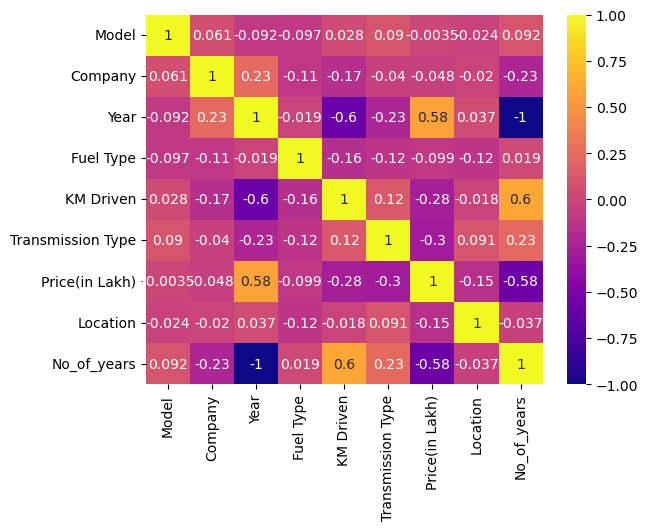

In [46]:
sns.heatmap(cor,annot =True,vmin=-1,vmax=1,center=0,cmap='plasma')

### Inference

We can conclude that there was a 

1.positive correlation & coefficient between KM driven & No_of_years

2.positive correlation & coefficient between Year & Price.


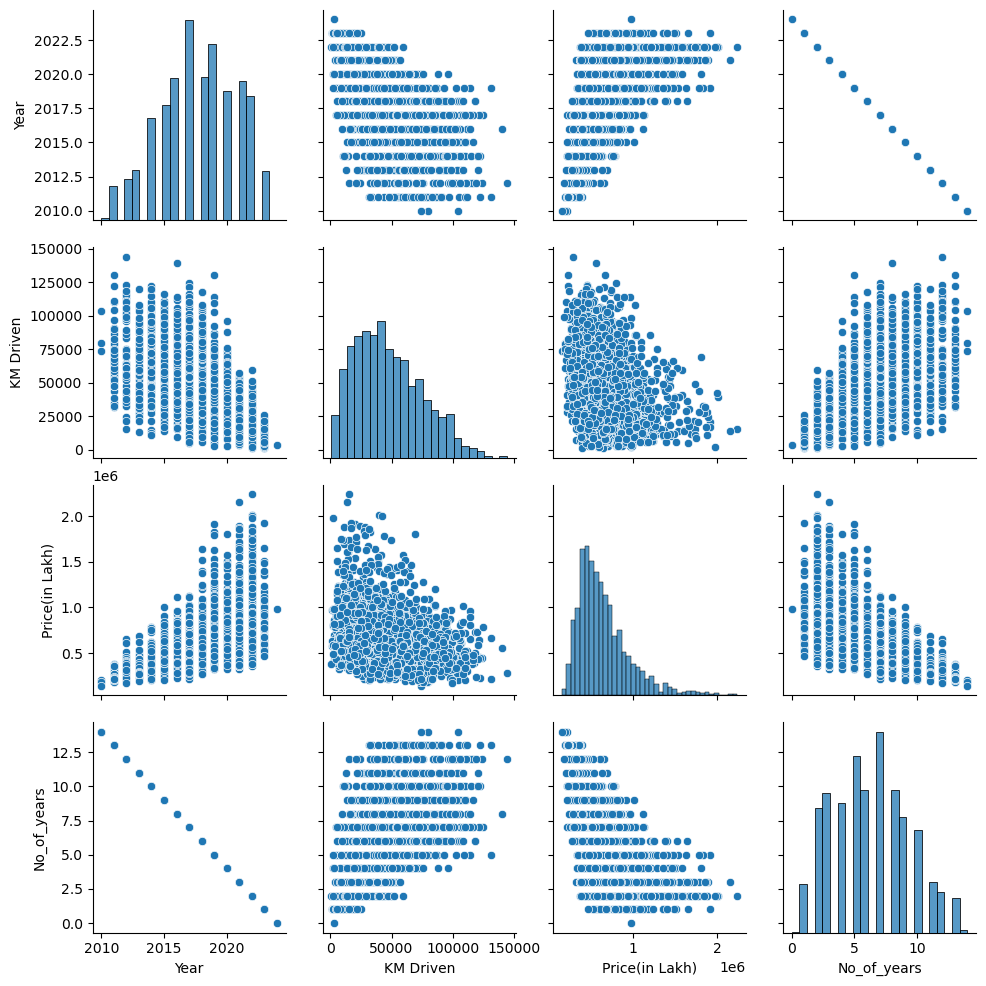

In [47]:
sns.pairplot(data=df)

By using pairplot we can see both distribution of single variables and Relationships between two variables.

<Axes: ylabel='No_of_years'>

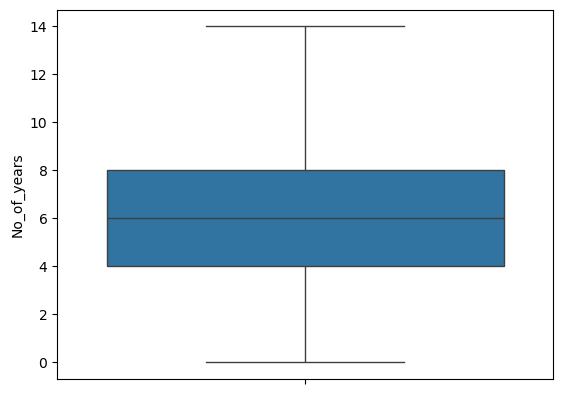

In [48]:
sns.boxplot(df['No_of_years'])

Text(0.5, 1.0, 'Car selling Tenure')

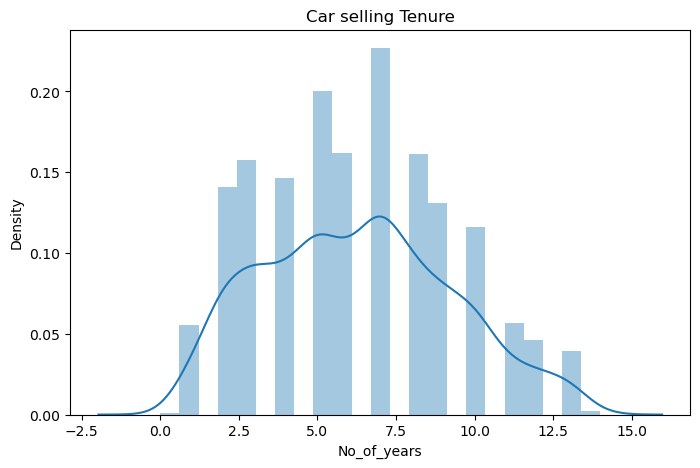

In [49]:
plt.figure(figsize=(8,5))
sns.distplot(df['No_of_years']);
plt.title('Car selling Tenure')

### Inference

No of years is mostly lying between 2 to 10 years.

<Axes: ylabel='Price(in Lakh)'>

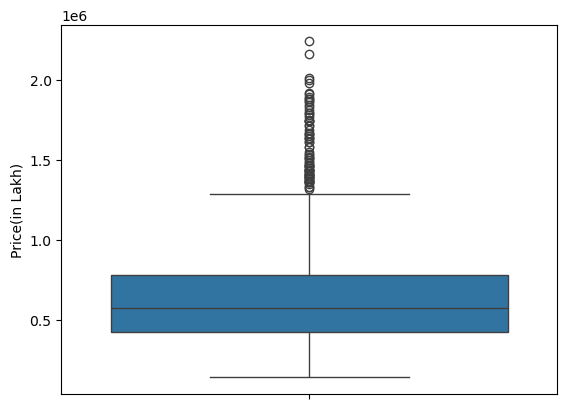

In [50]:
sns.boxplot(df['Price(in Lakh)'])

<Axes: ylabel='KM Driven'>

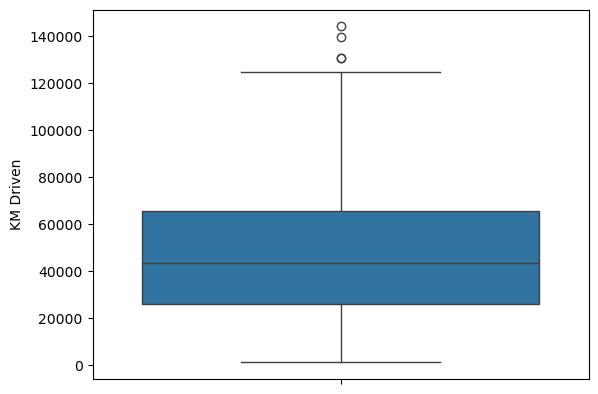

In [51]:
sns.boxplot(df['KM Driven'])

Text(0.5, 1.0, 'Car Driving kilometers')

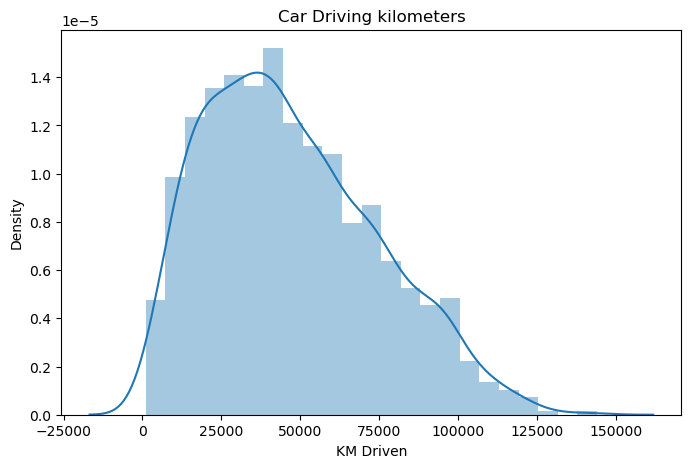

In [52]:
plt.figure(figsize=(8,5))
sns.distplot(df['KM Driven']);
plt.title('Car Driving kilometers')

Text(0.5, 1.0, 'Car selling price distribution')

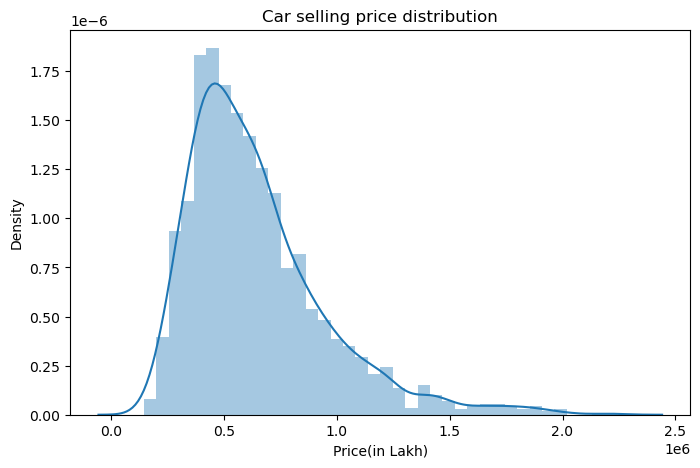

In [53]:
plt.figure(figsize=(8,5))
sns.distplot(df['Price(in Lakh)']);
plt.title('Car selling price distribution')

We can see that selling price of a used car is lying most between 1 to 5 lakhs.

As the maximum price of the used car is more than 20 lakhs Hence we see it is Right Skewed.

So there was the Outliers, we need to performed the Qunatile method.




### Using IQR method

In [54]:
df2=df.copy()
IQR= df2['KM Driven'].quantile(0.75)-df2['KM Driven'].quantile(0.25)
upper = df2['KM Driven'].quantile(0.75)+(1.5*IQR)
lower = df2['KM Driven'].quantile(0.25)-(1.5*IQR)
df2[(df['KM Driven']> upper) | (df['KM Driven']<lower)]

Model   Company  Year Fuel Type  KM Driven  \
191  Amaze 1.5L I-DTEC V     Honda  2019    DIESEL     130578   
301        i10 MAGNA 1.2   Hyundai  2011    PETROL     130587   
374         Brio S(O) MT     Honda  2012    PETROL     143991   
965     Bolero ZLX BS IV  Mahindra  2016    DIESEL     139583   

    Transmission Type  Price(in Lakh)   Location  No_of_years  
191            Manual          661000  Bangalore            5  
301            Manual          218000  Bangalore           13  
374            Manual          285000  Bangalore           12  
965            Manual          554000  Bangalore            8

In [55]:
df2.shape[0]

2020

In [56]:
df2=df.copy()
IQR= df2['Price(in Lakh)'].quantile(0.75)-df2['Price(in Lakh)'].quantile(0.25)
upper = df2['Price(in Lakh)'].quantile(0.75)+(1.5*IQR)
lower = df1['Price(in Lakh)'].quantile(0.25)-(1.5*IQR)
df2[(df['Price(in Lakh)']> upper) | (df['Price(in Lakh)']<lower)].shape[0]

80

so out of 2020 rows we have 80 Outliers

In [57]:
df3=df2.copy()
IQR= df3['KM Driven'].quantile(0.75)-df3['KM Driven'].quantile(0.25)
upper = df3['KM Driven'].quantile(0.75)+(1.5*IQR)
lower = df3['KM Driven'].quantile(0.25)-(1.5*IQR)
df3[(df2['KM Driven']> upper) | (df2['KM Driven']<lower)].shape[0]

4

so out of 2020 rows we have 4 Outliers

In [58]:
Used_car = df1.copy()

In [59]:
Used_car

Model  Company  Year  Fuel Type  KM Driven  Transmission Type  \
0       159        1  2017          2      98493                  0   
1       283        5  2018          2      19178                  0   
2       210        1  2017          2      33963                  1   
3       437        4  2012          2      64557                  1   
4       149        1  2019          1      43987                  1   
...     ...      ...   ...        ...        ...                ...   
2015     72        4  2018          0      44307                  1   
2016     22        4  2017          0      54581                  1   
2017    261        4  2019          2       8644                  0   
2018    193        4  2019          0      62412                  1   
2019    264        4  2020          2      50179                  0   

      Price(in Lakh)  Location  No_of_years  
0             973000         0            7  
1             407000         0            6  
2             381000         0            7  
3             463000         0           12  
4            1150000         0            5  
...              ...       ...          ...  
2015          566000         3            6  
2016          290000         3            7  
2017          521000         3            5  
2018          468000         3            5  
2019          547000         3            4  

[2020 rows x 9 columns]

In [60]:
minmax = MinMaxScaler()
for i in Used_car.columns:
    Used_car[i]=minmax.fit_transform(Used_car[i].values.reshape(-1,1))

In [61]:
Used_car

Model   Company      Year  Fuel Type  KM Driven  Transmission Type  \
0     0.271795  0.166667  0.500000        1.0   0.681788                0.0   
1     0.483761  0.833333  0.571429        1.0   0.127060                0.0   
2     0.358974  0.166667  0.500000        1.0   0.230466                1.0   
3     0.747009  0.666667  0.142857        1.0   0.444440                1.0   
4     0.254701  0.166667  0.642857        0.5   0.300574                1.0   
...        ...       ...       ...        ...        ...                ...   
2015  0.123077  0.666667  0.571429        0.0   0.302812                1.0   
2016  0.037607  0.666667  0.500000        0.0   0.374668                1.0   
2017  0.446154  0.666667  0.642857        1.0   0.053385                0.0   
2018  0.329915  0.666667  0.642857        0.0   0.429438                1.0   
2019  0.451282  0.666667  0.714286        1.0   0.343880                0.0   

      Price(in Lakh)  Location  No_of_years  
0           0.395515       0.0     0.500000  
1           0.125477       0.0     0.428571  
2           0.113073       0.0     0.500000  
3           0.152195       0.0     0.857143  
4           0.479962       0.0     0.357143  
...              ...       ...          ...  
2015        0.201336       1.0     0.428571  
2016        0.069656       1.0     0.500000  
2017        0.179866       1.0     0.357143  
2018        0.154580       1.0     0.357143  
2019        0.192271       1.0     0.285714  

[2020 rows x 9 columns]

In [62]:
x = Used_car.drop('Price(in Lakh)',axis=1)
y = Used_car['Price(in Lakh)']

In [63]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=42)

In [64]:
print(f'xtrain shape{xtrain.shape}')
print(f'xtest shape{xtest.shape}')
print(f'ytrain shape{ytrain.shape}')
print(f'ytest shape{ytest.shape}')

xtrain shape(1616, 8)
xtest shape(404, 8)
ytrain shape(1616,)
ytest shape(404,)


In [65]:
xtrain.head()

Model   Company      Year  Fuel Type  KM Driven  Transmission Type  \
261   0.241026  0.166667  0.714286        1.0   0.222290                0.0   
1290  0.223932  0.000000  0.357143        1.0   0.421157                1.0   
979   0.223932  0.000000  0.571429        1.0   0.263407                1.0   
240   0.297436  0.833333  0.714286        1.0   0.176402                1.0   
1222  0.348718  0.166667  0.357143        1.0   0.349762                1.0   

      Location  No_of_years  
261   0.000000     0.285714  
1290  0.666667     0.642857  
979   0.000000     0.428571  
240   0.000000     0.285714  
1222  0.666667     0.642857

In [66]:
def helper(model,xtrain,ytrain,xtest,ytest):
    train_pred = model.predict(xtrain)
    test_pred = model.predict(xtest)

    train_acc = r2_score(ytrain,train_pred)
    test_acc = r2_score(ytest,test_pred)
    train_mse = mean_squared_error(ytrain,train_pred)
    test_mse = mean_squared_error(ytest,test_pred)
    train_mae = mean_absolute_error(ytrain,train_pred)
    test_mae = mean_absolute_error(ytest,test_pred)
    train_mape = mean_absolute_percentage_error(ytrain,train_pred)
    test_mape = mean_absolute_percentage_error(ytest,test_pred)

    acc_mat = {'Train Accuarcy on R2_Score':train_acc,"Test Accuraccy on R2_Score":test_acc,
               'Train Mean Square Error':train_mse,'Test Mean Square Error':test_mse,
              'Train Mean Absolute Percentage Error':train_mape,'Test Mean Absolute Percentage Error':test_mape,}
    
    print(f'\nTrain Accuarcy on R2_Score :  {round((train_acc) * 100, 2)} %')
    print(f'Test Accuarcy on R2_Score :  {round((test_acc) * 100, 2)} %')
    print('Train Mean Square Error: ',train_mse)
    print('Test Mean Square Error: ',test_mse)
    print(f'Train Mean Absolute Error: {round((train_mae)*100,2)}%')
    print(f'Test Mean Absolute Error: {round((test_mae)*100,2)}%')
    print(f'Train Mean Absolute Percentage Error: {round((train_mape)*100,2)}%')
    print(f'Test Mean Absolute Percentage Error: {round((test_mape)*100,2)}%')


    return acc_mat

## Models

## Decision Tree Regressor

In [67]:
%%time
dtr= DecisionTreeRegressor(random_state=42)
dtr= dtr.fit(xtrain,ytrain)

Acc_mat_dtr = helper(dtr,xtrain,ytrain,xtest,ytest)


Train Accuarcy on R2_Score :  100.0 %
Test Accuarcy on R2_Score :  88.64 %
Train Mean Square Error:  1.4301459983073533e-36
Test Mean Square Error:  0.0027505921731493395
Train Mean Absolute Error: 0.0%
Test Mean Absolute Error: 3.47%
Train Mean Absolute Percentage Error: 0.0%
Test Mean Absolute Percentage Error: 15.74%
CPU times: total: 31.2 ms
Wall time: 23 ms


In [68]:
train_pred= dtr.predict(xtrain)
test_pred = dtr.predict(xtest)

In [69]:
dtr_train = round(r2_score(ytrain,train_pred)*100,2)
print('Train Accuarcy on R2_Score :',dtr_train)

Train Accuarcy on R2_Score : 100.0


In [70]:
dtr_test = round(r2_score(ytest,test_pred)*100,2)
print('Test Accuarcy on R2_Score :',dtr_test)

Test Accuarcy on R2_Score : 88.64


In [71]:
dtr_mse=mean_squared_error(ytest,test_pred)
print('Mean Square Error on Testing :',dtr_mse)

Mean Square Error on Testing : 0.0027505921731493395


In [72]:
dtr_mae= mean_absolute_error(ytest,test_pred)
print('Mean absolute Error on Testing:',dtr_mae)

Mean absolute Error on Testing: 0.034688893507671376


In [73]:
dtr_mape= mean_absolute_percentage_error(ytest,test_pred)
print('Mean absolute Percentage Error on Testing:',dtr_mape)

Mean absolute Percentage Error on Testing: 0.15740879376883032


## Random Forest Regressor

In [74]:
%%time
rdf = RandomForestRegressor(n_estimators=250,random_state=42)
rdf = rdf.fit(xtrain,ytrain)

Acc_mat_rdf = helper(rdf,xtrain,ytrain,xtest,ytest)


Train Accuarcy on R2_Score :  98.59 %
Test Accuarcy on R2_Score :  92.04 %
Train Mean Square Error:  0.00029390062688147933
Test Mean Square Error:  0.0019277101759613087
Train Mean Absolute Error: 1.05%
Test Mean Absolute Error: 2.87%
Train Mean Absolute Percentage Error: 2462985823350.12%
Test Mean Absolute Percentage Error: 14.46%
CPU times: total: 1.8 s
Wall time: 1.81 s


In [75]:
train_pred= rdf.predict(xtrain)
test_pred = rdf.predict(xtest)

In [76]:
rdf_train = round(r2_score(ytrain,train_pred)*100,2)
print('Train Accuarcy on R2_Score :', rdf_train)

Train Accuarcy on R2_Score : 98.59


In [77]:
rdf_test = round(r2_score(ytest,test_pred)*100,2)
print('Test Accuarcy on R2_Score : ',rdf_test)

Test Accuarcy on R2_Score :  92.04


In [78]:
rdf_mse=mean_squared_error(ytest,test_pred)
print('Mean Square Error on Testing :',rdf_mse)

Mean Square Error on Testing : 0.0019277101759613087


In [79]:
rdf_mae= mean_absolute_error(ytest,test_pred)
print('Mean absolute Error on Testing:',rdf_mae)

Mean absolute Error on Testing: 0.028746008427178584


In [80]:
rdf_mape= mean_absolute_percentage_error(ytest,test_pred)
print('Mean absolute Percentage Error on Testing:',rdf_mape)

Mean absolute Percentage Error on Testing: 0.14461252952259593


## Linear Regression

In [81]:
%%time
lgr = LinearRegression()
lgr = lgr.fit(xtrain,ytrain)

Acc_mat_lgr = helper(lgr,xtrain,ytrain,xtest,ytest)


Train Accuarcy on R2_Score :  45.9 %
Test Accuarcy on R2_Score :  44.55 %
Train Mean Square Error:  0.011238579183968095
Test Mean Square Error:  0.013419784060959684
Train Mean Absolute Error: 7.94%
Test Mean Absolute Error: 8.3%
Train Mean Absolute Percentage Error: 3844208352104.56%
Test Mean Absolute Percentage Error: 40.61%
CPU times: total: 109 ms
Wall time: 81 ms


In [82]:
train_pred= lgr.predict(xtrain)
test_pred = lgr.predict(xtest)

In [83]:
lgr_train = round(r2_score(ytrain,train_pred)*100,2)
print('Train Accuarcy on R2_Score :',lgr_train)

Train Accuarcy on R2_Score : 45.9


In [84]:
lgr_test = round(r2_score(ytest,test_pred)*100,2)
print('Test Accuarcy on R2_Score :',lgr_test)

Test Accuarcy on R2_Score : 44.55


In [85]:
lgr_mse = mean_squared_error(ytest,test_pred)
print('Test Accuracy on R2_Score:' ,lgr_mse)

Test Accuracy on R2_Score: 0.013419784060959684


In [86]:
lgr_mae= mean_absolute_error(ytest,test_pred)
print('Mean absolute Error on Testing:',lgr_mae)

Mean absolute Error on Testing: 0.0830372367872149


In [87]:
lgr_mape= mean_absolute_percentage_error(ytest,test_pred)
print('Mean absolute Percentage Error on Testing:',lgr_mape)

Mean absolute Percentage Error on Testing: 0.4061099885061883


## Gradiant Boosting Regressor

In [88]:
%%time
gbr = GradientBoostingRegressor()
gbr = gbr.fit(xtrain,ytrain)

Acc_mat_gbr = helper(gbr,xtrain,ytrain,xtest,ytest)


Train Accuarcy on R2_Score :  87.79 %
Test Accuarcy on R2_Score :  84.37 %
Train Mean Square Error:  0.0025357418323698143
Test Mean Square Error:  0.0037830153680017903
Train Mean Absolute Error: 3.4%
Test Mean Absolute Error: 3.81%
Train Mean Absolute Percentage Error: 5376560274548.8%
Test Mean Absolute Percentage Error: 17.28%
CPU times: total: 312 ms
Wall time: 241 ms


In [89]:
train_pred= gbr.predict(xtrain)
test_pred = gbr.predict(xtest)

In [90]:
gbr_train = round(r2_score(ytrain,train_pred)*100,2)
print('Train Accuarcy on R2_Score :',gbr_train)

Train Accuarcy on R2_Score : 87.79


In [91]:
gbr_test = round(r2_score(ytest,test_pred)*100,2)
print('Test Accuarcy on R2_Score :',gbr_test)

Test Accuarcy on R2_Score : 84.37


In [92]:
gbr_mse=mean_squared_error(ytest,test_pred)
print('Mean Square Error on Testing :',gbr_mse)

Mean Square Error on Testing : 0.0037830153680017903


In [93]:
gbr_mae= mean_absolute_error(ytest,test_pred)
print('Mean absolute Error on Testing:',gbr_mae)

Mean absolute Error on Testing: 0.038094575451672795


In [94]:
gbr_mape= mean_absolute_percentage_error(ytest,test_pred)
print('Mean absolute Percentage Error on Testing:',gbr_mape)

Mean absolute Percentage Error on Testing: 0.1728484915476968


## AdaBoost Regressor

In [95]:
%%time
adr = AdaBoostRegressor()
adr = adr.fit(xtrain,ytrain)

Acc_mat_adr =helper(adr,xtrain,ytrain,xtest,ytest)


Train Accuarcy on R2_Score :  55.26 %
Test Accuarcy on R2_Score :  59.15 %
Train Mean Square Error:  0.009293397935372554
Test Mean Square Error:  0.009886328924017553
Train Mean Absolute Error: 8.08%
Test Mean Absolute Error: 7.88%
Train Mean Absolute Percentage Error: 46870593723969.8%
Test Mean Absolute Percentage Error: 55.33%
CPU times: total: 141 ms
Wall time: 174 ms


In [96]:
train_pred= adr.predict(xtrain)
test_pred = adr.predict(xtest)

In [97]:
adr_train = round(r2_score(ytrain,train_pred)*100,2)
print('Train Accuarcy on R2_Score :',adr_train)

Train Accuarcy on R2_Score : 55.26


In [98]:
adr_test = round(r2_score(ytest,test_pred)*100,2)
print('Test Accuarcy on R2_Score :',adr_test) 

Test Accuarcy on R2_Score : 59.15


In [99]:
adr_mse=mean_squared_error(ytest,test_pred)
print('Mean Square Error on Testing :',adr_mse)

Mean Square Error on Testing : 0.009886328924017553


In [100]:
adr_mae= mean_absolute_error(ytest,test_pred)
print('Mean absolute Error on Testing:',adr_mae)

Mean absolute Error on Testing: 0.07881450109585715


In [101]:
adr_mape= mean_absolute_percentage_error(ytest,test_pred)
print('Mean absolute Percentage Error on Testing:',adr_mape)

Mean absolute Percentage Error on Testing: 0.5532718168957261


In [102]:
base_model=['🥇 Decision Tree','\U0001F349 AdaBoost Regressor', '🥉 Random Forest', ' \U0001F34D Linear Regression', '🥈 Gradiant Boosting']

train_r2_score=[dtr_train,adr_train,rdf_train,lgr_train,gbr_train]
test_r2_score =[dtr_test,adr_test,rdf_test,lgr_test,gbr_test]
MSE_test = [dtr_mse,adr_mse,rdf_mse,lgr_mse,gbr_mse]
MAE_test =[dtr_mae,adr_mae,rdf_mae,lgr_mae,gbr_mae]
MAPE_test = [dtr_mape,adr_mape,rdf_mape,lgr_mape,gbr_mape]

base_model_conclusion = pd.DataFrame({'Models':base_model,'Train R2_score':train_r2_score,'Test R2_Score':test_r2_score,'Mean Square Error on Testing':MSE_test, 
                                      'Mean absolute Error on Testing':MAE_test,'Mean absolute percentage error':MAPE_test}).style.background_gradient(axis=None, cmap='YlGn', low=0.95, high=1.0)

In [103]:
base_model_conclusion 

## From the above models we can conclude top 3 models for prediction are
Random Forest

Decision Tree

Gradiant Boosting

# Thank You